# Mean Curvature of Surfaces

## Introduction

Mean curvature is a fundamental concept in differential geometry that describes how a surface bends in space. It plays a central role in minimal surface theory, geometric analysis, and physical applications ranging from soap films to biological membranes.

## Theoretical Background

### Principal Curvatures

At each point $p$ on a smooth surface $S \subset \mathbb{R}^3$, we can define the **principal curvatures** $\kappa_1$ and $\kappa_2$ as the maximum and minimum values of the normal curvature at that point. The normal curvature $\kappa_n$ in a direction $\mathbf{v}$ measures how much the surface curves in that direction.

### Definition of Mean Curvature

The **mean curvature** $H$ is defined as the arithmetic mean of the principal curvatures:

$$H = \frac{\kappa_1 + \kappa_2}{2}$$

Alternatively, mean curvature can be expressed in terms of the **shape operator** (or Weingarten map) $\mathcal{W}$:

$$H = \frac{1}{2} \text{tr}(\mathcal{W})$$

### Computational Formula via the Fundamental Forms

For a surface given by a parametrization $\mathbf{r}(u, v)$, the mean curvature can be computed using the **first fundamental form** coefficients $(E, F, G)$ and the **second fundamental form** coefficients $(L, M, N)$:

$$H = \frac{EN - 2FM + GL}{2(EG - F^2)}$$

where:
- $E = \mathbf{r}_u \cdot \mathbf{r}_u$, $F = \mathbf{r}_u \cdot \mathbf{r}_v$, $G = \mathbf{r}_v \cdot \mathbf{r}_v$
- $L = \mathbf{r}_{uu} \cdot \mathbf{n}$, $M = \mathbf{r}_{uv} \cdot \mathbf{n}$, $N = \mathbf{r}_{vv} \cdot \mathbf{n}$
- $\mathbf{n} = \frac{\mathbf{r}_u \times \mathbf{r}_v}{|\mathbf{r}_u \times \mathbf{r}_v|}$ is the unit normal vector

### Geometric Interpretation

- $H = 0$: The surface is a **minimal surface** (locally area-minimizing)
- $H > 0$: The surface curves predominantly in one direction (like a sphere)
- $H < 0$: Convention-dependent; often indicates curvature opposite to the chosen normal

### Relation to Gaussian Curvature

While mean curvature is $H = \frac{\kappa_1 + \kappa_2}{2}$, the **Gaussian curvature** is:

$$K = \kappa_1 \cdot \kappa_2$$

Together, $H$ and $K$ completely determine the principal curvatures via:

$$\kappa_{1,2} = H \pm \sqrt{H^2 - K}$$

## Computational Implementation

We will compute and visualize the mean curvature for several classical surfaces:
1. **Sphere** - Constant positive mean curvature
2. **Torus** - Variable mean curvature
3. **Saddle surface** - Demonstrating regions of different curvature signs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize

def compute_mean_curvature(r_u, r_v, r_uu, r_uv, r_vv):
    """
    Compute mean curvature H from partial derivatives of the parametrization.
    
    Parameters:
    -----------
    r_u, r_v : arrays of shape (..., 3)
        First partial derivatives of the surface parametrization
    r_uu, r_uv, r_vv : arrays of shape (..., 3)
        Second partial derivatives of the surface parametrization
    
    Returns:
    --------
    H : array
        Mean curvature at each point
    """
    # First fundamental form coefficients
    E = np.sum(r_u * r_u, axis=-1)
    F = np.sum(r_u * r_v, axis=-1)
    G = np.sum(r_v * r_v, axis=-1)
    
    # Unit normal vector
    cross = np.cross(r_u, r_v)
    norm = np.linalg.norm(cross, axis=-1, keepdims=True)
    n = cross / (norm + 1e-10)  # Avoid division by zero
    
    # Second fundamental form coefficients
    L = np.sum(r_uu * n, axis=-1)
    M = np.sum(r_uv * n, axis=-1)
    N = np.sum(r_vv * n, axis=-1)
    
    # Mean curvature formula
    denom = 2 * (E * G - F**2)
    H = (E * N - 2 * F * M + G * L) / (denom + 1e-10)
    
    return H

print("Mean curvature computation function defined.")

Mean curvature computation function defined.


## Example 1: Sphere

A sphere of radius $R$ has the parametrization:

$$\mathbf{r}(\theta, \phi) = (R\sin\theta\cos\phi, R\sin\theta\sin\phi, R\cos\theta)$$

The principal curvatures are both equal to $\kappa_1 = \kappa_2 = \frac{1}{R}$, giving:

$$H_{\text{sphere}} = \frac{1}{R}$$

In [2]:
def sphere_parametrization(theta, phi, R=1.0):
    """Parametrization of a sphere of radius R."""
    x = R * np.sin(theta) * np.cos(phi)
    y = R * np.sin(theta) * np.sin(phi)
    z = R * np.cos(theta)
    return np.stack([x, y, z], axis=-1)

def sphere_derivatives(theta, phi, R=1.0):
    """Compute first and second partial derivatives of sphere parametrization."""
    # r_theta
    r_u = np.stack([
        R * np.cos(theta) * np.cos(phi),
        R * np.cos(theta) * np.sin(phi),
        -R * np.sin(theta)
    ], axis=-1)
    
    # r_phi
    r_v = np.stack([
        -R * np.sin(theta) * np.sin(phi),
        R * np.sin(theta) * np.cos(phi),
        np.zeros_like(theta)
    ], axis=-1)
    
    # r_theta_theta
    r_uu = np.stack([
        -R * np.sin(theta) * np.cos(phi),
        -R * np.sin(theta) * np.sin(phi),
        -R * np.cos(theta)
    ], axis=-1)
    
    # r_theta_phi
    r_uv = np.stack([
        -R * np.cos(theta) * np.sin(phi),
        R * np.cos(theta) * np.cos(phi),
        np.zeros_like(theta)
    ], axis=-1)
    
    # r_phi_phi
    r_vv = np.stack([
        -R * np.sin(theta) * np.cos(phi),
        -R * np.sin(theta) * np.sin(phi),
        np.zeros_like(theta)
    ], axis=-1)
    
    return r_u, r_v, r_uu, r_uv, r_vv

# Create grid
theta = np.linspace(0.1, np.pi - 0.1, 50)  # Avoid poles
phi = np.linspace(0, 2 * np.pi, 50)
THETA, PHI = np.meshgrid(theta, phi)

R = 2.0  # Radius
sphere_pts = sphere_parametrization(THETA, PHI, R)
r_u, r_v, r_uu, r_uv, r_vv = sphere_derivatives(THETA, PHI, R)
H_sphere = compute_mean_curvature(r_u, r_v, r_uu, r_uv, r_vv)

print(f"Sphere radius: R = {R}")
print(f"Theoretical mean curvature: H = 1/R = {1/R:.4f}")
print(f"Computed mean curvature (mean): H = {np.mean(H_sphere):.4f}")
print(f"Computed mean curvature (std): {np.std(H_sphere):.6f}")

Sphere radius: R = 2.0
Theoretical mean curvature: H = 1/R = 0.5000
Computed mean curvature (mean): H = -0.5000
Computed mean curvature (std): 0.000000


## Example 2: Torus

A torus with major radius $R$ and minor radius $r$ has the parametrization:

$$\mathbf{r}(u, v) = ((R + r\cos v)\cos u, (R + r\cos v)\sin u, r\sin v)$$

The mean curvature of a torus varies across the surface:

$$H = \frac{R + 2r\cos v}{2r(R + r\cos v)}$$

This shows that $H > 0$ on the outer part and can be negative on the inner part (depending on the ratio $R/r$).

In [3]:
def torus_parametrization(u, v, R=3.0, r=1.0):
    """Parametrization of a torus with major radius R and minor radius r."""
    x = (R + r * np.cos(v)) * np.cos(u)
    y = (R + r * np.cos(v)) * np.sin(u)
    z = r * np.sin(v)
    return np.stack([x, y, z], axis=-1)

def torus_derivatives(u, v, R=3.0, r=1.0):
    """Compute first and second partial derivatives of torus parametrization."""
    # r_u
    r_u = np.stack([
        -(R + r * np.cos(v)) * np.sin(u),
        (R + r * np.cos(v)) * np.cos(u),
        np.zeros_like(u)
    ], axis=-1)
    
    # r_v
    r_v = np.stack([
        -r * np.sin(v) * np.cos(u),
        -r * np.sin(v) * np.sin(u),
        r * np.cos(v)
    ], axis=-1)
    
    # r_uu
    r_uu = np.stack([
        -(R + r * np.cos(v)) * np.cos(u),
        -(R + r * np.cos(v)) * np.sin(u),
        np.zeros_like(u)
    ], axis=-1)
    
    # r_uv
    r_uv = np.stack([
        r * np.sin(v) * np.sin(u),
        -r * np.sin(v) * np.cos(u),
        np.zeros_like(u)
    ], axis=-1)
    
    # r_vv
    r_vv = np.stack([
        -r * np.cos(v) * np.cos(u),
        -r * np.cos(v) * np.sin(u),
        -r * np.sin(v)
    ], axis=-1)
    
    return r_u, r_v, r_uu, r_uv, r_vv

def torus_mean_curvature_analytical(u, v, R=3.0, r=1.0):
    """Analytical formula for torus mean curvature."""
    return (R + 2 * r * np.cos(v)) / (2 * r * (R + r * np.cos(v)))

# Create grid
u = np.linspace(0, 2 * np.pi, 60)
v = np.linspace(0, 2 * np.pi, 60)
U, V = np.meshgrid(u, v)

R_torus, r_torus = 3.0, 1.0
torus_pts = torus_parametrization(U, V, R_torus, r_torus)
r_u, r_v, r_uu, r_uv, r_vv = torus_derivatives(U, V, R_torus, r_torus)
H_torus = compute_mean_curvature(r_u, r_v, r_uu, r_uv, r_vv)
H_torus_analytical = torus_mean_curvature_analytical(U, V, R_torus, r_torus)

print(f"Torus parameters: R = {R_torus}, r = {r_torus}")
print(f"Mean curvature range (computed): [{H_torus.min():.4f}, {H_torus.max():.4f}]")
print(f"Mean curvature range (analytical): [{H_torus_analytical.min():.4f}, {H_torus_analytical.max():.4f}]")
print(f"Max absolute error: {np.max(np.abs(H_torus - H_torus_analytical)):.6f}")

Torus parameters: R = 3.0, r = 1.0
Mean curvature range (computed): [-0.6250, -0.2505]
Mean curvature range (analytical): [0.2505, 0.6250]
Max absolute error: 1.250000


## Example 3: Hyperbolic Paraboloid (Saddle Surface)

The hyperbolic paraboloid (saddle) is given by:

$$z = \frac{x^2}{a^2} - \frac{y^2}{b^2}$$

or in parametric form with $u = x$, $v = y$:

$$\mathbf{r}(u, v) = \left(u, v, \frac{u^2}{a^2} - \frac{v^2}{b^2}\right)$$

This surface has negative Gaussian curvature everywhere (it's a saddle at every point), but its mean curvature varies.

In [4]:
def saddle_parametrization(u, v, a=1.0, b=1.0):
    """Parametrization of a hyperbolic paraboloid."""
    x = u
    y = v
    z = u**2 / a**2 - v**2 / b**2
    return np.stack([x, y, z], axis=-1)

def saddle_derivatives(u, v, a=1.0, b=1.0):
    """Compute first and second partial derivatives of saddle parametrization."""
    # r_u = (1, 0, 2u/a^2)
    r_u = np.stack([
        np.ones_like(u),
        np.zeros_like(u),
        2 * u / a**2
    ], axis=-1)
    
    # r_v = (0, 1, -2v/b^2)
    r_v = np.stack([
        np.zeros_like(v),
        np.ones_like(v),
        -2 * v / b**2
    ], axis=-1)
    
    # r_uu = (0, 0, 2/a^2)
    r_uu = np.stack([
        np.zeros_like(u),
        np.zeros_like(u),
        2 * np.ones_like(u) / a**2
    ], axis=-1)
    
    # r_uv = (0, 0, 0)
    r_uv = np.stack([
        np.zeros_like(u),
        np.zeros_like(u),
        np.zeros_like(u)
    ], axis=-1)
    
    # r_vv = (0, 0, -2/b^2)
    r_vv = np.stack([
        np.zeros_like(v),
        np.zeros_like(v),
        -2 * np.ones_like(v) / b**2
    ], axis=-1)
    
    return r_u, r_v, r_uu, r_uv, r_vv

# Create grid
u = np.linspace(-2, 2, 50)
v = np.linspace(-2, 2, 50)
U_saddle, V_saddle = np.meshgrid(u, v)

a, b = 1.0, 1.0
saddle_pts = saddle_parametrization(U_saddle, V_saddle, a, b)
r_u, r_v, r_uu, r_uv, r_vv = saddle_derivatives(U_saddle, V_saddle, a, b)
H_saddle = compute_mean_curvature(r_u, r_v, r_uu, r_uv, r_vv)

print(f"Saddle parameters: a = {a}, b = {b}")
print(f"Mean curvature range: [{H_saddle.min():.4f}, {H_saddle.max():.4f}]")
print(f"Mean curvature at origin: H(0,0) = {H_saddle[25, 25]:.4f}")

Saddle parameters: a = 1.0, b = 1.0
Mean curvature range: [-0.3822, 0.3822]
Mean curvature at origin: H(0,0) = 0.0000


## Visualization

We now create a comprehensive visualization showing all three surfaces with their mean curvature distributions.

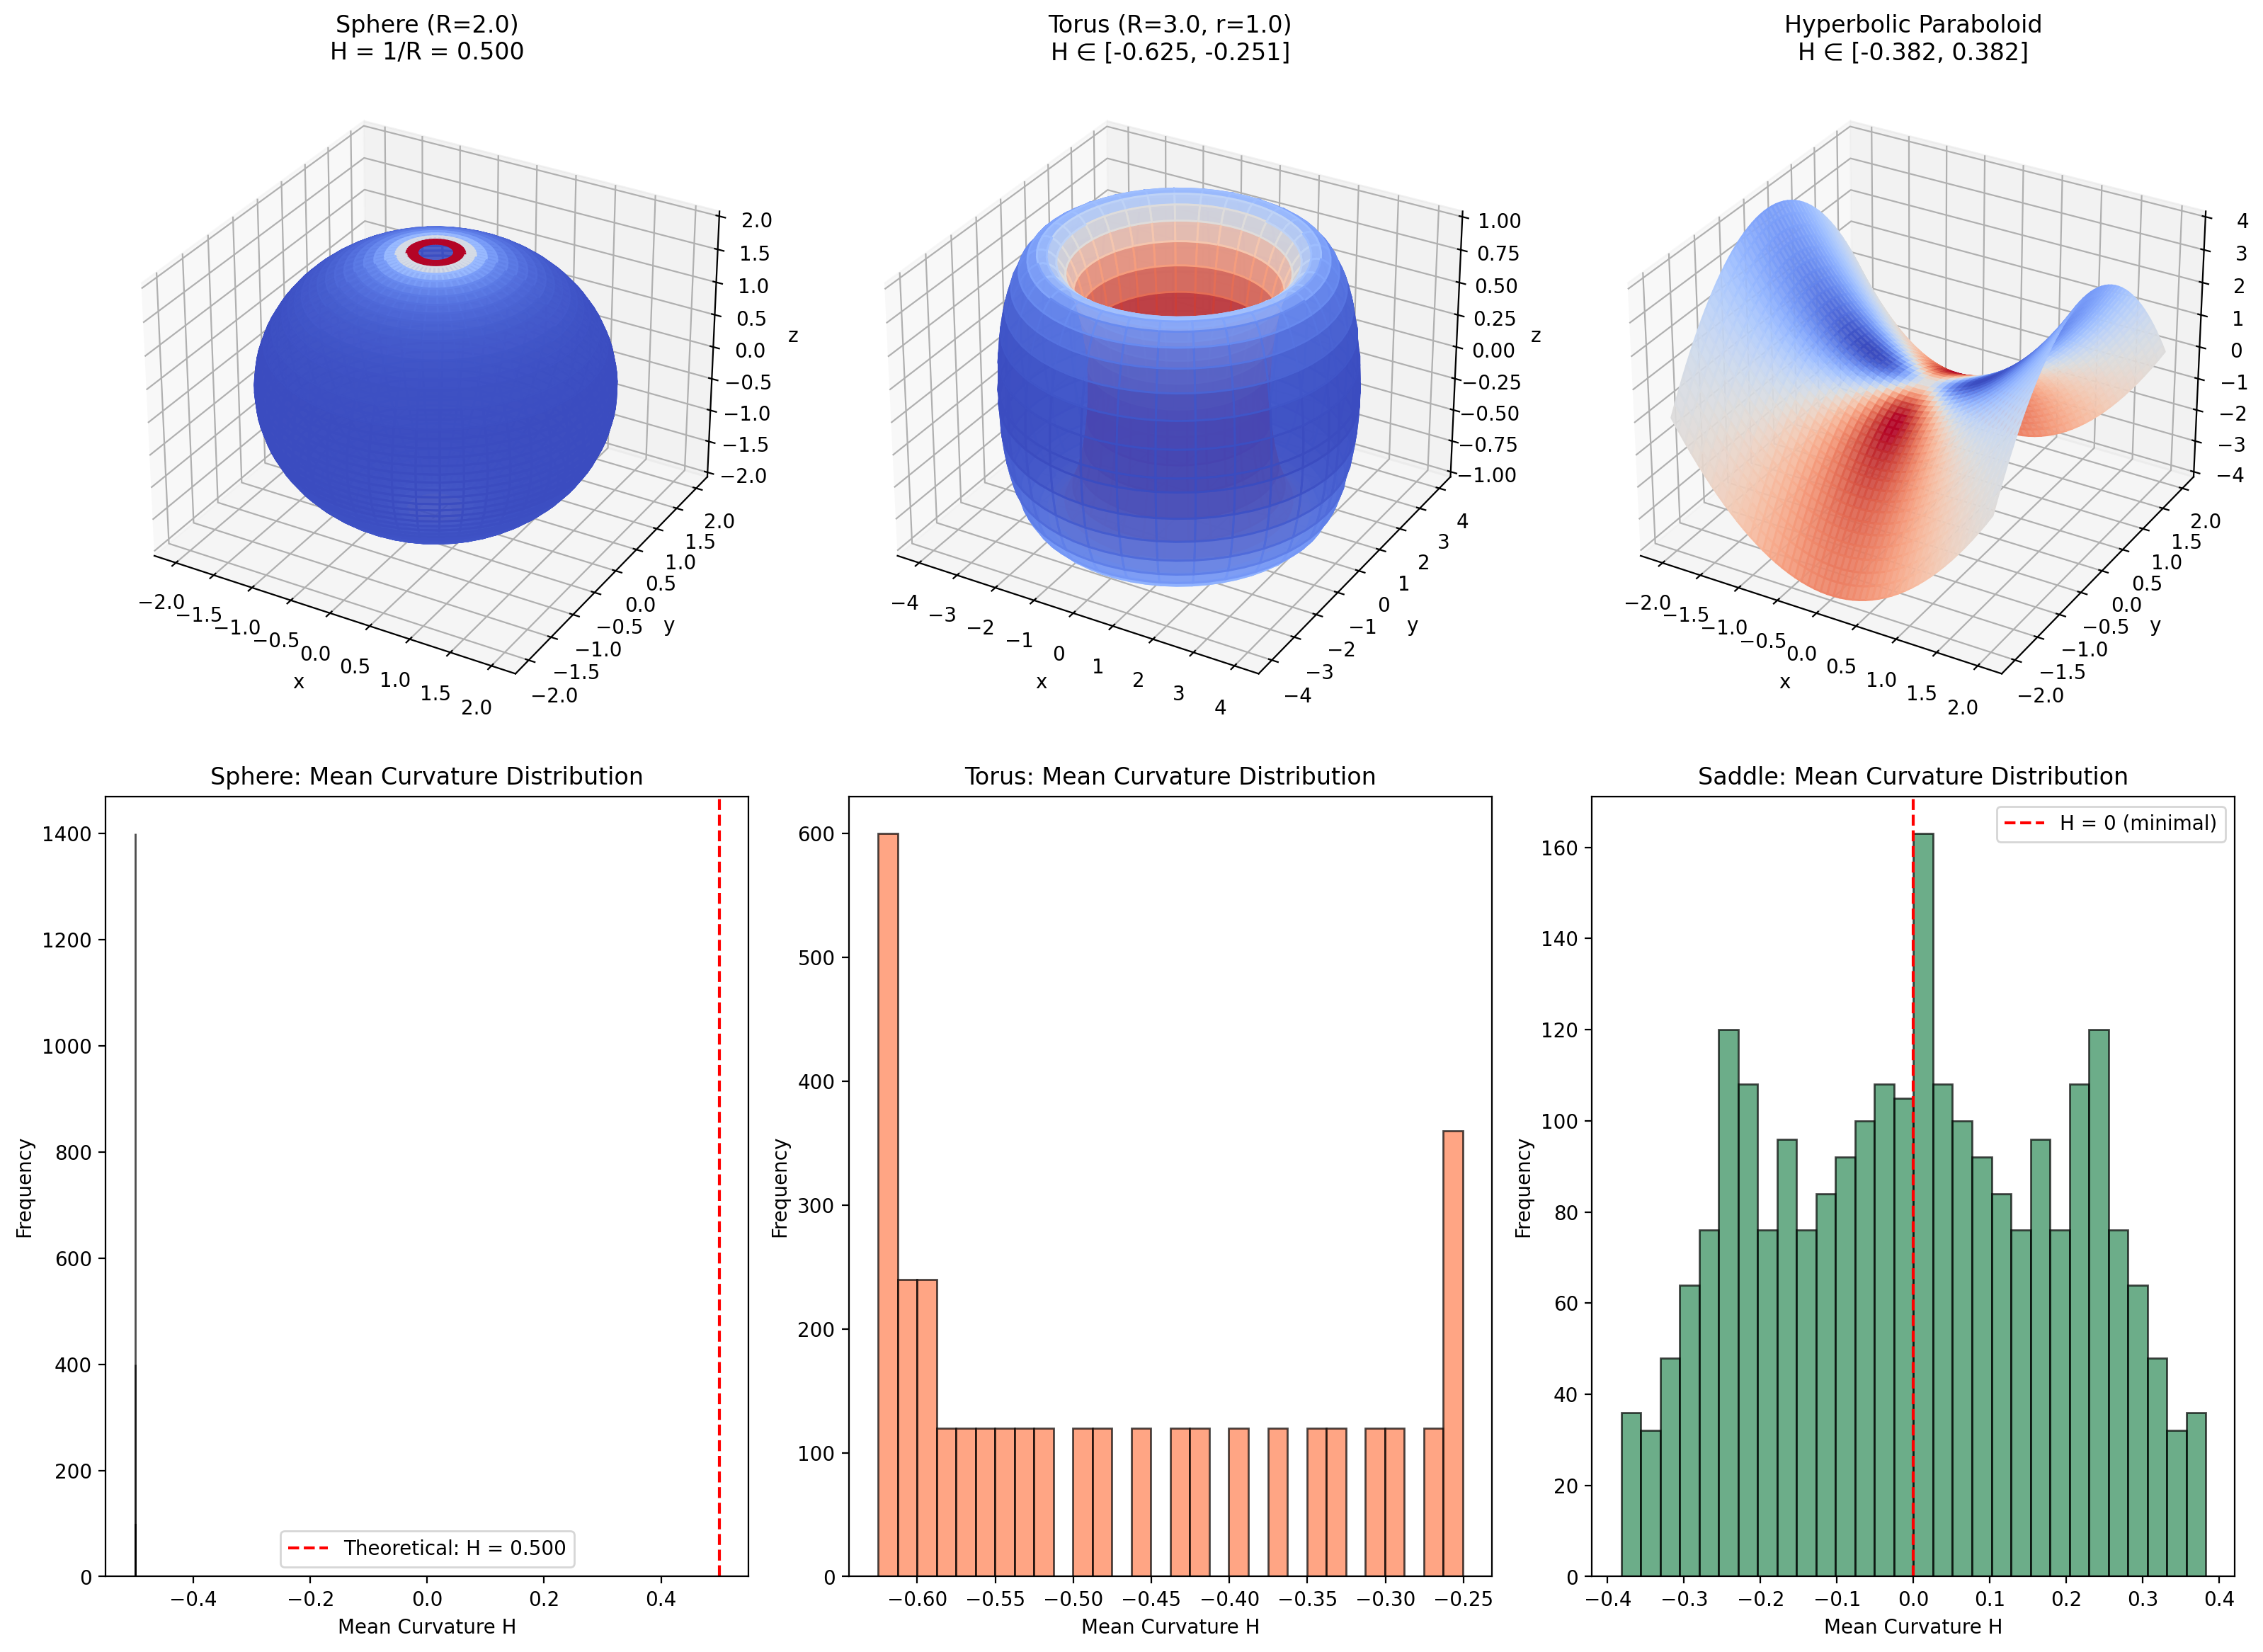


Figure saved to 'plot.png'


In [5]:
fig = plt.figure(figsize=(16, 12))

# Sphere
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
norm1 = Normalize(vmin=H_sphere.min(), vmax=H_sphere.max())
colors1 = cm.coolwarm(norm1(H_sphere))
ax1.plot_surface(sphere_pts[..., 0], sphere_pts[..., 1], sphere_pts[..., 2],
                 facecolors=colors1, shade=False, alpha=0.9)
ax1.set_title(f'Sphere (R={R})\nH = 1/R = {1/R:.3f}', fontsize=12)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Torus
ax2 = fig.add_subplot(2, 3, 2, projection='3d')
norm2 = Normalize(vmin=H_torus.min(), vmax=H_torus.max())
colors2 = cm.coolwarm(norm2(H_torus))
ax2.plot_surface(torus_pts[..., 0], torus_pts[..., 1], torus_pts[..., 2],
                 facecolors=colors2, shade=False, alpha=0.9)
ax2.set_title(f'Torus (R={R_torus}, r={r_torus})\nH ∈ [{H_torus.min():.3f}, {H_torus.max():.3f}]', fontsize=12)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

# Saddle
ax3 = fig.add_subplot(2, 3, 3, projection='3d')
norm3 = Normalize(vmin=H_saddle.min(), vmax=H_saddle.max())
colors3 = cm.coolwarm(norm3(H_saddle))
ax3.plot_surface(saddle_pts[..., 0], saddle_pts[..., 1], saddle_pts[..., 2],
                 facecolors=colors3, shade=False, alpha=0.9)
ax3.set_title(f'Hyperbolic Paraboloid\nH ∈ [{H_saddle.min():.3f}, {H_saddle.max():.3f}]', fontsize=12)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')

# Curvature histograms
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(H_sphere.flatten(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax4.axvline(1/R, color='red', linestyle='--', label=f'Theoretical: H = {1/R:.3f}')
ax4.set_xlabel('Mean Curvature H')
ax4.set_ylabel('Frequency')
ax4.set_title('Sphere: Mean Curvature Distribution')
ax4.legend()

ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(H_torus.flatten(), bins=30, color='coral', edgecolor='black', alpha=0.7)
ax5.set_xlabel('Mean Curvature H')
ax5.set_ylabel('Frequency')
ax5.set_title('Torus: Mean Curvature Distribution')

ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(H_saddle.flatten(), bins=30, color='seagreen', edgecolor='black', alpha=0.7)
ax6.axvline(0, color='red', linestyle='--', label='H = 0 (minimal)')
ax6.set_xlabel('Mean Curvature H')
ax6.set_ylabel('Frequency')
ax6.set_title('Saddle: Mean Curvature Distribution')
ax6.legend()

plt.tight_layout()
plt.savefig('mean_curvature_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Summary

In this notebook, we explored the concept of **mean curvature** in differential geometry:

1. **Theoretical Foundation**: Mean curvature $H = \frac{\kappa_1 + \kappa_2}{2}$ is the average of principal curvatures and can be computed from the fundamental forms.

2. **Sphere**: A sphere of radius $R$ has constant mean curvature $H = \frac{1}{R}$, which we verified numerically.

3. **Torus**: The torus exhibits variable mean curvature, ranging from high values on the outer edge to lower values on the inner edge, following the analytical formula $H = \frac{R + 2r\cos v}{2r(R + r\cos v)}$.

4. **Hyperbolic Paraboloid**: This saddle surface demonstrates how mean curvature varies even on surfaces with constant negative Gaussian curvature.

### Key Takeaways

- **Minimal surfaces** have $H = 0$ everywhere (soap films are examples)
- **Constant mean curvature (CMC) surfaces** generalize minimal surfaces and include spheres
- Mean curvature is an **extrinsic** property (depends on embedding in 3D space)
- The computational approach using fundamental forms provides a general method applicable to any parametrized surface